# WEB-SCRAPING PROJECT ON WORLD POPULATION 
---
 
  * Many times in real life we have to get information from the web pages which may be in a different format such as text and tables.
  * To complete this project, I have scraped population data from Worldmeters website.
  * URL = "https://www.worldometers.info/world-population/population-by-country/"

### COUNTRIES IN THE WORLD POPULATION (2022) :
 
  * This list includes both **countries**  and **dependent territories**. 
  * Data based on the latest **United Nations Population Division Estimates**.
  
#### Attributes Information :

| Variable_name ||| Description |
| --- ||| --- |
| Country (or dependency) ||| Name of the country |	
| Population (2020)	||| Population of the country in a given year | 
| Yearly Change	||| Change in population since last year |
| Net Change ||| Anual changes in population (Resulting from births and deaths |
| Density (P/Km²) ||| Urbanization and Population Density |
| Land Area (Km²) ||| The area of Land in Square kilometers |
| Migrants (net) ||| Number of migrants |	
| Fert. Rate ||| Fertility rate (in %) |   	
| Med. Age ||| Median age of the populaiton |	
| Urban Pop % ||| % of the population is living in an Urban area |	
| World Share ||| The share of the world's population (in %) |


### Q1.Please scrape the table properly using BeautifulSoup.

In [2]:
# Importing the required libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## ALLOWS TO HANDLE THE WARNINGS
import warnings 
warnings.filterwarnings("ignore")

import missingno as msno
from bs4 import BeautifulSoup

In [3]:
# Downloading contents of the web page
url = "https://www.worldometers.info/world-population/population-by-country/"
data = requests.get(url).text

In [4]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [5]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table', 'table-striped', 'table-bordered']


In [6]:
# Creating list with all tables
tables = soup.find_all('table')

table = soup.find('table', class_='table table-striped table-bordered')


In [7]:
# CREATING THE HEADERS THAT CAN ADD ALL THE COLUMNS NAMES 
headers = []
## FINDING ALL THE COLUMNS IN THEAD
## IGNORING THE 1ST COLUMN NAME WHICH '#' NO REQUIRED
for i in table.find_all('th')[1:]:
    title = i.text.strip()
    ## APPENDING THE ALL TITLES TO HEADERS 
    headers.append(title)

In [8]:
# CREATING THE DATAFRAME AS "countries_population"
## AND ASSIGNING THOSE COOLECTED COLUMNS IN THE DATAFRAME
countries_population = pd.DataFrame(columns = headers)
countries_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share


In [9]:
# FINDING ALL ROWS WHICH ARE IN 'TROW'
## AND IGNORING THE 1ST ROW WHICH THE COLUMNS NAME ROW
## AND INGOIRNG THE VALUES OF IGNORED COLUMN '#' 
for row in table.find_all('tr')[1:]:
  data = row.find_all('td')
  row_data = [td.text.strip() for td in data][1:]
  length = len(countries_population)
  ## ASSIGNING ALL THE VALUES TO DATAFRAME
  countries_population.loc[length] = row_data            
countries_population    

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [10]:
## GETTING 1ST 5 OBSERVATIONS FROM DATA SET 

countries_population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [11]:
# CHECKING LAST 5 ROWS WHETHER THE 1 FIVE AND LAST FIVE ROWS ARE SAME OR NOT

countries_population.tail()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %
234,Holy See,801,0.25 %,2,"2,003",0,,N.A.,N.A.,N.A.,0.00 %


### Q3.Please report number of rows and columns

In [12]:
# CHECING THE SHAPE OF THE DATA  

countries_population.shape

(235, 11)

| COLUMNS ||| ROWS |
| --- ||| --- |
| 11 ||| 235 |
 
  * ###### Data is having 11 variables and 235 observations.

### Q2.Once the table is scraped, perform some basic data cleaning steps. 

In [13]:
## CHECKING THE DATA SIZE

countries_population.size

2585

In [14]:
## WE ARE HAVING THE SPECIAL CHARECTERS IN THE DATA 
## REPLACING THE SPECIAL CHARECTER '%' WITH ''

countries_population = countries_population.replace('\%', '', regex = True)
countries_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39,"5,540,090",153,"9,388,211","-348,399",1.7,38,61,18.47
1,India,"1,380,004,385",0.99,"13,586,631",464,"2,973,190","-532,687",2.2,28,35,17.70
2,United States,"331,002,651",0.59,"1,937,734",36,"9,147,420","954,806",1.8,38,83,4.25
3,Indonesia,"273,523,615",1.07,"2,898,047",151,"1,811,570","-98,955",2.3,30,56,3.51
4,Pakistan,"220,892,340",2.00,"4,327,022",287,"770,880","-233,379",3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,992",0.06,3,50,100,,N.A.,N.A.,10,0.00
231,Falkland Islands,"3,480",3.05,103,0,"12,170",,N.A.,N.A.,66,0.00
232,Niue,"1,626",0.68,11,6,260,,N.A.,N.A.,46,0.00
233,Tokelau,"1,357",1.27,17,136,10,,N.A.,N.A.,0,0.00


In [15]:
## REPLACING SPECIAL CHARECTER ',' WITH ''
countries_population = countries_population.replace('\,', '', regex = True)
countries_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50,100,,N.A.,N.A.,10,0.00
231,Falkland Islands,3480,3.05,103,0,12170,,N.A.,N.A.,66,0.00
232,Niue,1626,0.68,11,6,260,,N.A.,N.A.,46,0.00
233,Tokelau,1357,1.27,17,136,10,,N.A.,N.A.,0,0.00


In [16]:
## WE ARE HAVING NULL VALUES AS SPACE 
## REPLACING ' ' WITH NAN

countries_population = countries_population.replace('', np.nan)
countries_population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50,100,NaN,N.A.,N.A.,10,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,N.A.,N.A.,66,0.00
232,Niue,1626,0.68,11,6,260,NaN,N.A.,N.A.,46,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,N.A.,N.A.,0,0.00


In [17]:
## REPLACING STRING 'N.A.' WITH NaN
## AND SAVING THE DATA IN 'CP' 
CP = countries_population.replace('N.A.', np.nan)
CP

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66,0.00
232,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0,0.00


In [18]:
## GETTING THE INFORMATION OF THE DATAFRAME 
countries_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    object
 2   Yearly Change            235 non-null    object
 3   Net Change               235 non-null    object
 4   Density (P/Km²)          235 non-null    object
 5   Land Area (Km²)          235 non-null    object
 6   Migrants (net)           201 non-null    object
 7   Fert. Rate               235 non-null    object
 8   Med. Age                 235 non-null    object
 9   Urban Pop %              235 non-null    object
 10  World Share              235 non-null    object
dtypes: object(11)
memory usage: 22.0+ KB


* ###### All variables are reading as 'object'
* ###### Except 'Country' variable remaing all the variables are not object type data. So, converting remaining all the variables data types.

In [19]:
## CONVERTING DATA TYPE INTO 'FLOAT' TYPE DATA 

CP['Yearly Change'] = CP['Yearly Change'].astype(float)
CP['Fert. Rate'] = CP['Fert. Rate'].astype(float)
CP['Med. Age'] = CP['Med. Age'].astype(float)
CP['Urban Pop %'] = CP['Urban Pop %'].astype(float)
CP['World Share'] = CP['World Share'].astype(float)
CP['Migrants (net)'] = CP['Migrants (net)'].astype(float)

# CHECKING INFORMATION
CP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    object 
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    object 
 4   Density (P/Km²)          235 non-null    object 
 5   Land Area (Km²)          235 non-null    object 
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              222 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), object(5)
memory usage: 22.0+ KB


In [20]:
## CONVERTING THE DATA TYPE INTO 'INT' TYPE DATA

CP['Population (2020)'] = CP['Population (2020)'].astype(int)
CP['Net Change'] = CP['Net Change'].astype(int)
CP['Density (P/Km²)'] = CP['Density (P/Km²)'].astype(int)
CP['Land Area (Km²)'] = CP['Land Area (Km²)'].astype(int)
CP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int32  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int32  
 4   Density (P/Km²)          235 non-null    int32  
 5   Land Area (Km²)          235 non-null    int32  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              222 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), int32(4), object(1)
memory usage: 18.4+ KB


In [21]:
## READING THE DATA FRAME TO  CHECK ALL THE VARIABLES AND OBSERVATIONS.

CP

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
232,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00


In [34]:
# Checking for the statistical measures for all numerical data
CP.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000,235.000000
mean,3.317120e+07,1.104298,3.461058e+05,478.408511,5.535918e+05,-5.442786,2.692040,30.621891,59.445946,0.425489
std,1.351370e+08,1.075665,1.128255e+06,2331.282424,1.687796e+06,123292.057588,1.264253,9.119557,24.099797,1.733713
min,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,4.188015e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,5.459642e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,-960.000000,2.300000,30.000000,61.500000,0.070000
75%,2.057705e+07,1.850000,2.496600e+05,240.000000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.265000
max,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [37]:
# checking for statistical measure for chategorical data
CP.describe(include = "object")

,Country (or dependency)
count,235
unique,235
top,China
freq,1


In [40]:
# checking for the unique values of all the variables 
CP.nunique()

Country (or dependency)    235
Population (2020)          235
Yearly Change              174
Net Change                 234
Density (P/Km²)            165
Land Area (Km²)            226
Migrants (net)             158
Fert. Rate                  50
Med. Age                    34
Urban Pop %                 80
World Share                 74
dtype: int64

In [43]:
# checking for the all the unique values of the data
CP.nunique().sum()

1665

### Q4.Please report if there is any missing value in the dataset. (Do not remove or fill it)

In [23]:
## CHECKING THE NULL VALUES IN THE DATA FRAME

CP.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

| VARIABLES ||| NULL_VALUES |
| --- ||| --- |
| Migrants ||| 34 |
| Fertility Rate ||| 34 |
| Median Age ||| 34 |

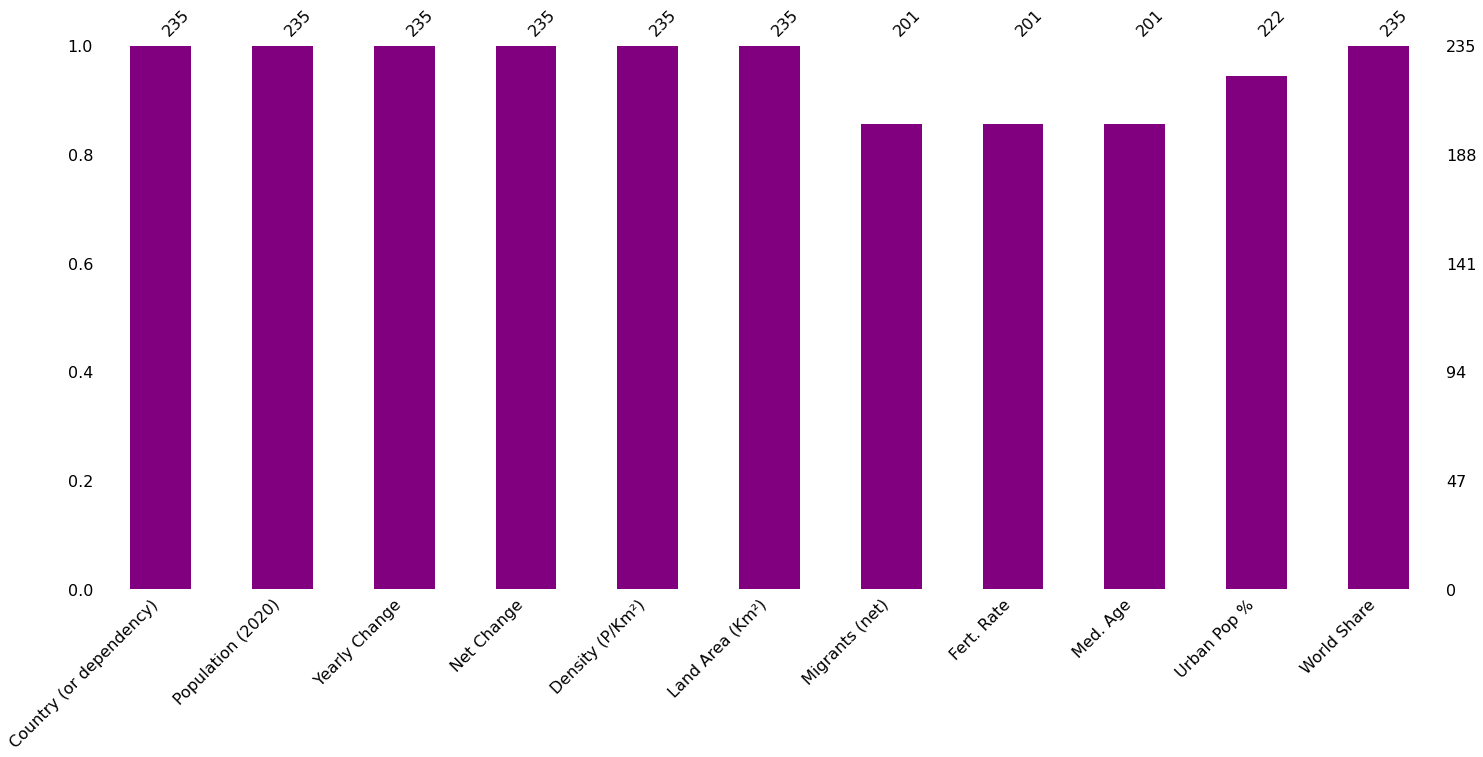

In [24]:
## BY USING MISSINGNO BAR PLOT CHECKING NULL VALUES COUNT

msno.bar(CP, color = 'purple')
plt.show()

### Q5. Please rename the columns appropriately.

In [25]:
## REANMING ALL THE COLUMNS NAMES AND SAVING IN A NEW DATAFRAME 'cp'
cp = CP.rename(columns = {'Country (or dependency)' : 'Country', 'Population (2020)' : 'Population', 
                            'Density (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Land Area',
                           'Migrants (net)' : 'Migrants', 'Urban Pop %' : 'Urban Population', 'Fert. Rate' : 'Fertility Rate',
                           'Med. Age' : 'Median Age'})
cp

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
232,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00


### Q6. Please report the top three countries based on the density column. 

In [26]:
## SORTING THE VALUES OF DENSITY TO GET TOP THREE VALUES BY GIVING 'HEAD'
## AND NOW WE CAN GET THE TOP 3 COUNTRIES WITH DENSITY 
cp.sort_values(by = ['Density'], ascending = False).head(3)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
213,Monaco,39242,0.71,278,26337,1,NaN,NaN,NaN,NaN,0.00
166,Macao,649335,1.39,8890,21645,30,5000.0,1.2,39.0,NaN,0.01
113,Singapore,5850342,0.79,46005,8358,700,27028.0,1.2,42.0,NaN,0.08


 * ###### Top Three countries based on the Density
| Country | Density |
| --- | --- |
| Monaco | 26,337 |
| Macao | 21,645 |
| Singapore | 8358 |

### Q7. Which country has the highest fertility rate and which country has the lowest fertility rate?

In [27]:
## BY USING 'LOC' FUNCTION TO FINDING THE COUNTRY WHICH IS HIVING THE HIGHEST FERTILITY RATE 

cp_country = cp.loc[cp['Fertility Rate'] == cp['Fertility Rate'].max()]
cp_country

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
55,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31


###### Highest Fertility rate country is : 
| Contry | Fertility Rate |
| --- | --- |
| Niger | 7.0 |

In [28]:
## BY USING 'LOC' FUNCTION TO FINDING THE COUNTRY WHICH IS HIVING THE LOWEST FERTILITY RATE 

cp_country = cp.loc[cp['Fertility Rate'] == cp['Fertility Rate'].min()]
cp_country

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
27,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66


###### Lowest Fertility rate country is : 
| Contry | Fertility Rate |
| --- | --- |
| South Korea | 1.1 |

### Q8. Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.

Text(0.5, 1.0, 'Distribution of Population')

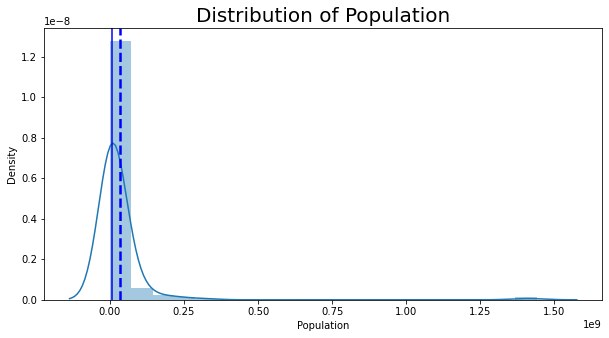

In [29]:
## VISUALIZING DISTRIBUTION OF 'Population' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(cp['Population'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=cp['Population'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=cp['Population'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show

## GIVING TITLE TO PLOT 
plt.title('Distribution of Population',fontsize=20) 

###### The 'Population' variable is highly right skewed.

Text(0.5, 1.0, 'Distribution of Median Age')

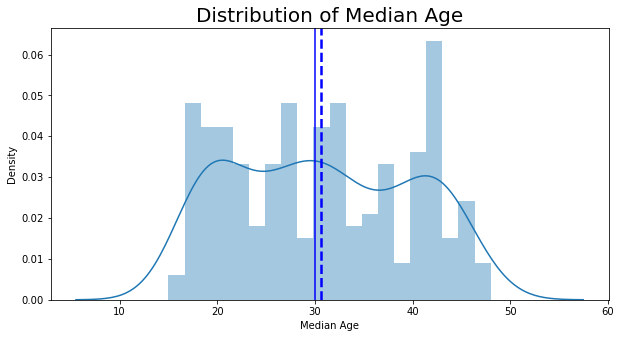

In [30]:
## VISUALIZING DISTRIBUTION OF 'Median Age' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(cp['Median Age'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=cp['Median Age'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=cp['Median Age'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show

## GIVING TITLE TO PLOT 
plt.title('Distribution of Median Age',fontsize=20) 

###### The 'Median Age' variable is normally distributed data.  

Text(0.5, 1.0, 'Distribution of Urban Population')

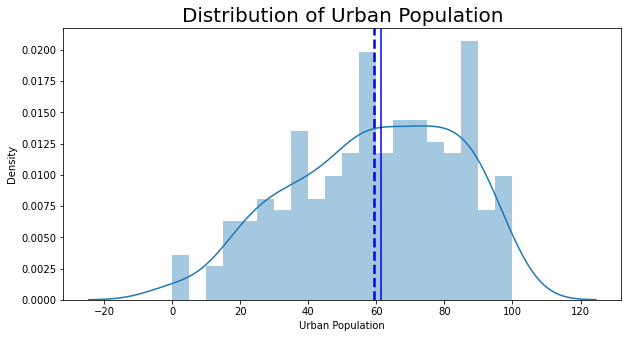

In [31]:
## VISUALIZING DISTRIBUTION OF 'Urban Population' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(cp['Urban Population'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=cp['Urban Population'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=cp['Urban Population'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show

## GIVING TITLE TO PLOT 
plt.title('Distribution of Urban Population',fontsize=20) 

###### The variable 'Urban Population' is moderately right skewed.

Text(0.5, 1.0, 'Distribution of Yearly Change')

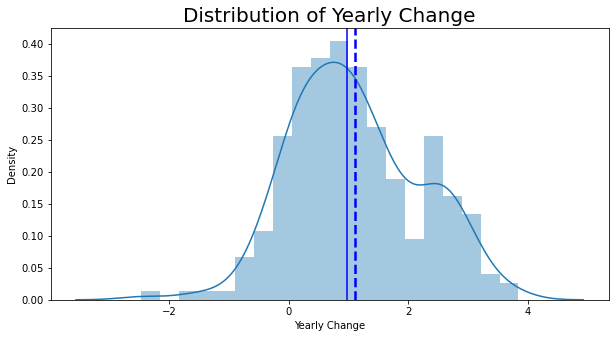

In [32]:
## VISUALIZING DISTRIBUTION OF 'Yearly Change' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(cp['Yearly Change'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=cp['Yearly Change'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=cp['Yearly Change'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show

## GIVING TITLE TO PLOT 
plt.title('Distribution of Yearly Change',fontsize=20) 

###### The variable 'Yearly Change' is normally distributed data.

### Q9. Please sort the population column based on lowest populated countries.

In [33]:
cp.sort_values(by = ['Population'], ascending = True)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
234,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00
232,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
230,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
